In [1]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [2]:
# Run inference on an image with YOLOv8n
!yolo predict model=yolov8n.pt source='https://ultralytics.com/images/zidane.jpg'

100% 6.23M/6.23M [00:00<00:00, 59.2MB/s]
Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100% 165k/165k [00:00<00:00, 7.36MB/s]
image 1/1 /content/zidane.jpg: 384x640 2 persons, 1 tie, 291.3ms
Speed: 20.7ms preprocess, 291.3ms inference, 41.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Train YOLOv8n on COCO8 for 3 epochs
!yolo train model=yolov8n.pt data=/content/drive/MyDrive/dataset/data.yaml epochs=200 imgsz=640

Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/dataset/data.yaml, epochs=200, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_co

In [8]:
!zip -r /content/detect.zip /content/runs/detect

  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/train2/ (stored 0%)
  adding: content/runs/detect/train2/events.out.tfevents.1706886118.18e5694b2728.10454.0 (deflated 87%)
  adding: content/runs/detect/train2/val_batch1_pred.jpg (deflated 8%)
  adding: content/runs/detect/train2/args.yaml (deflated 52%)
  adding: content/runs/detect/train2/train_batch7220.jpg (deflated 8%)
  adding: content/runs/detect/train2/val_batch0_labels.jpg (deflated 8%)
  adding: content/runs/detect/train2/labels.jpg (deflated 22%)
  adding: content/runs/detect/train2/R_curve.png (deflated 11%)
  adding: content/runs/detect/train2/labels_correlogram.jpg (deflated 36%)
  adding: content/runs/detect/train2/val_batch1_labels.jpg (deflated 9%)
  adding: content/runs/detect/train2/confusion_matrix_normalized.png (deflated 21%)
  adding: content/runs/detect/train2/weights/ (stored 0%)
  adding: content/runs/detect/train2/weights/best.pt (deflated 10%)
  adding: content/runs/detect/train2/weig

In [9]:
from google.colab import files
files.download("/content/detect.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/runs/detect/train2/val_batch1_pred.jpg


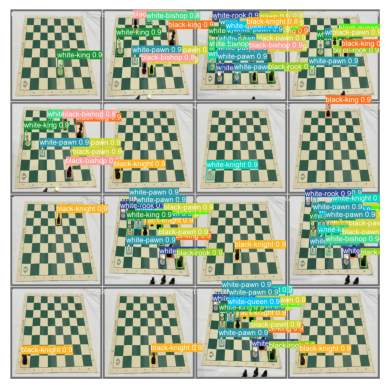

/content/runs/detect/train2/train_batch7220.jpg


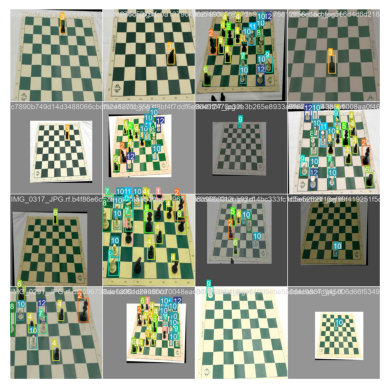

/content/runs/detect/train2/val_batch0_labels.jpg


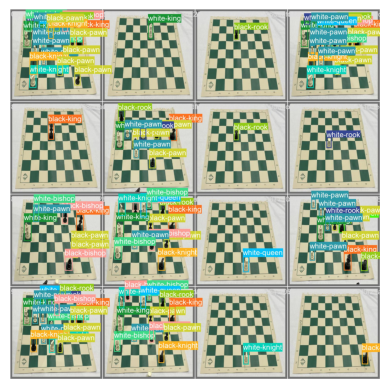

/content/runs/detect/train2/labels.jpg


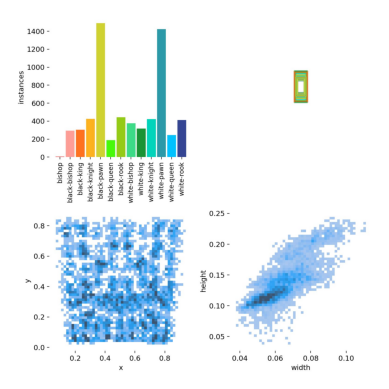

/content/runs/detect/train2/R_curve.png


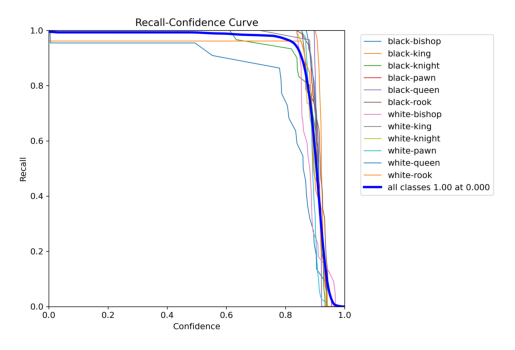

/content/runs/detect/train2/labels_correlogram.jpg


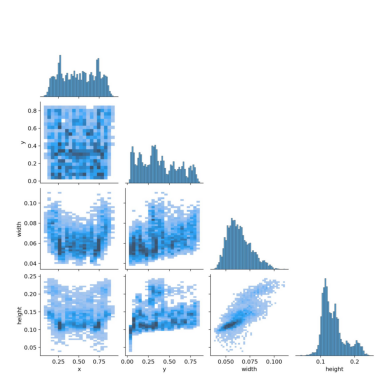

/content/runs/detect/train2/val_batch1_labels.jpg


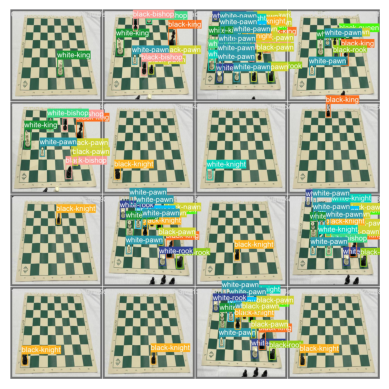

/content/runs/detect/train2/confusion_matrix_normalized.png


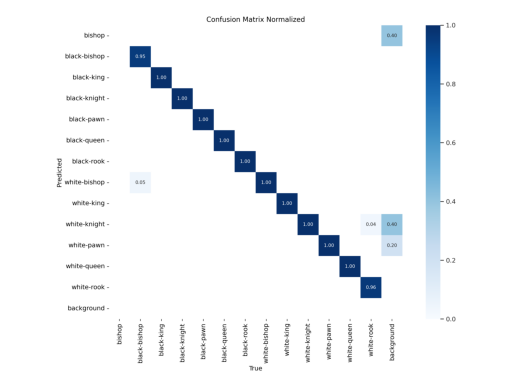

/content/runs/detect/train2/confusion_matrix.png


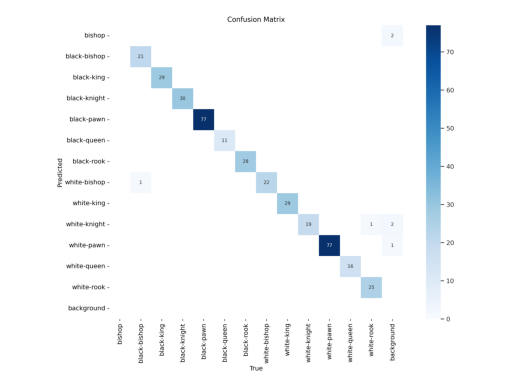

/content/runs/detect/train2/P_curve.png


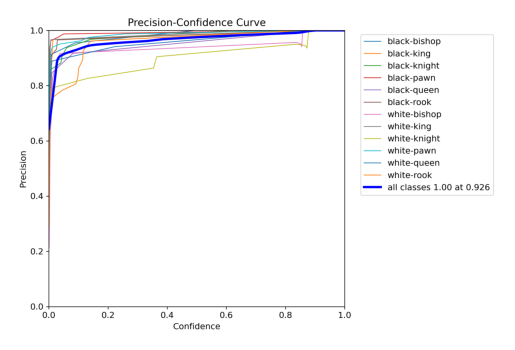

/content/runs/detect/train2/train_batch0.jpg


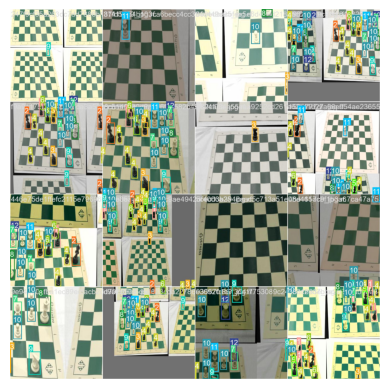

/content/runs/detect/train2/F1_curve.png


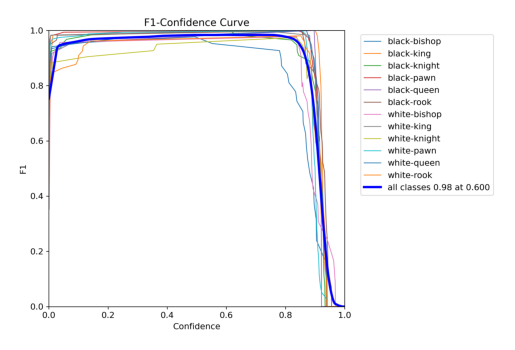

/content/runs/detect/train2/PR_curve.png


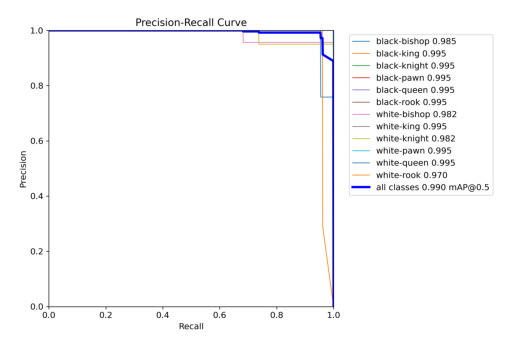

/content/runs/detect/train2/train_batch2.jpg


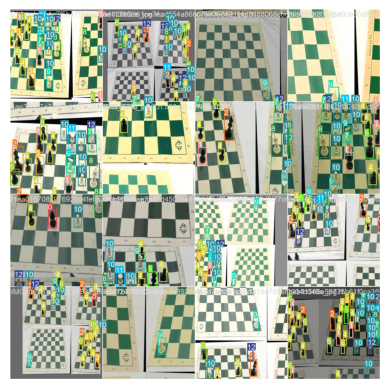

/content/runs/detect/train2/val_batch0_pred.jpg


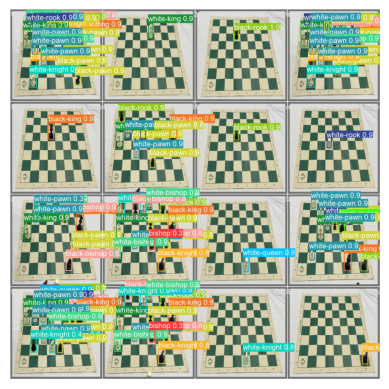

/content/runs/detect/train2/train_batch1.jpg


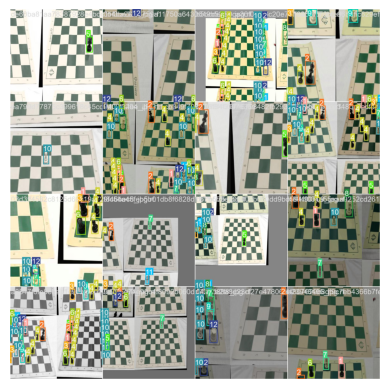

/content/runs/detect/train2/train_batch7222.jpg


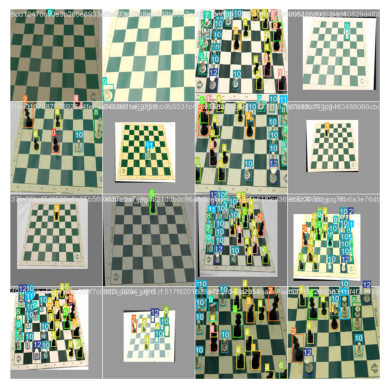

/content/runs/detect/train2/results.png


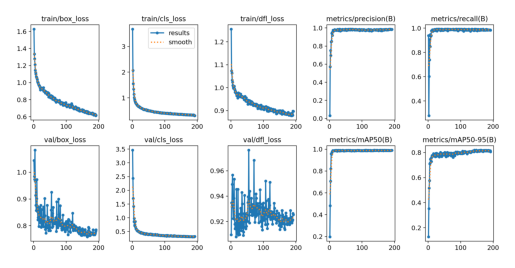

/content/runs/detect/train2/train_batch7221.jpg


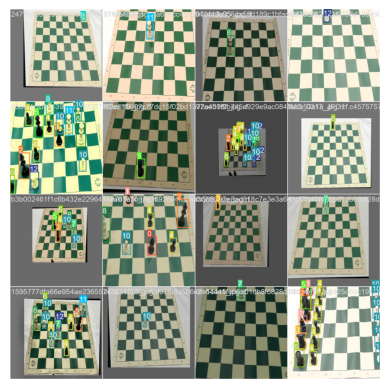

In [17]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Specifica il percorso della cartella delle immagini su Google Drive
cartella_immagini = '/content/runs/detect/train2'

# Elenco dei file nella cartella
files = os.listdir(cartella_immagini)

# Visualizzazione delle immagini
for file in files:
    if file.endswith('.jpg') or file.endswith('.png'):  # Modifica l'estensione del file se necessario
        img_path = os.path.join(cartella_immagini, file)
        img = mpimg.imread(img_path)
        print(img_path)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

